## 11.2 Preparing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
from data_loader import load_tokyo_temp
y, m, tokyo = load_tokyo_temp()

utsu_temp = np.genfromtxt("data/Utsunomiya_temp.csv",
                           delimiter=",",
                           usecols=(0, 1, 2)
                          )
utsu = utsu_temp[:, 2]

tokyo = tokyo[(1990 <= y)*(y <=2019)]
utsu = utsu[(1990 <= y)*(y <=2019)]
m = m[(1990 <= y)*(y <=2019)]
y = y[(1990 <= y)*(y <=2019)]



In [3]:
tokyoc = np.zeros([12])
utsuc = np.zeros([12])

for mm in range(1, 13):
    tokyoc[mm-1] = np.nanmean(tokyo[m==mm], 0)
    utsuc[mm-1] = np.nanmean(utsu[m==mm], 0)

tokyoa = np.zeros((tokyo.shape))
utsua = np.zeros((utsu.shape))
for yy in range(1990, 2020):
    for mm in range(1, 13):
        tokyoa[(y==yy)*(m==mm)] = tokyo[(y==yy)*(m==mm)] - tokyoc[mm-1]
        utsua[(y==yy)*(m==mm)] = utsu[(y==yy)*(m==mm)] - utsuc[mm-1]

tokyoa = signal.detrend(tokyoa)
utsua = signal.detrend(utsua)

### 11.3 Variance and Standard Deviation

In [4]:
print(np.var(tokyoa))
print(np.var(utsua))

1.0319958222914387
1.0844095840574333


In [5]:
print(np.std(tokyoa))
print(np.std(utsua))

1.015871951720018
1.0413498855127576


In [6]:
def draw_scatter(x, y, xname, yname):
    plt.scatter(x, y)
    plt.axhline(y=0, xmin=-10, xmax=10, color='k')
    plt.axvline(x=0, ymin=-10, ymax=10, color='k')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.gca().set_aspect('equal', adjustable='box')


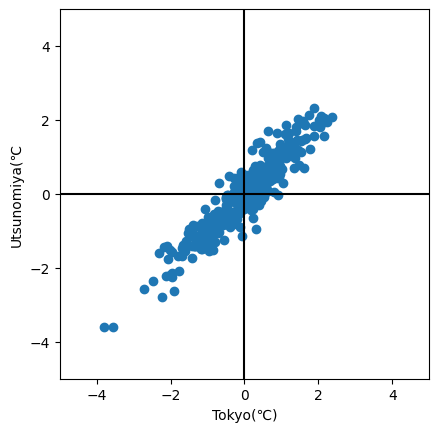

In [7]:
draw_scatter(tokyoa, utsua, 'Tokyo(℃)', 'Utsunomiya(℃')

### 11.5 find the direction of maximizing variance

In [8]:
N = tokyoa.shape[0]
X = np.array([tokyoa, utsua])

In [9]:
C = X @ X.T / N
[Lam, E] = np.linalg.eig(C)
index = Lam.argsort()[::-1]
Lam = Lam[index]
L = np.diag(Lam)

print("E")
print(E)

print("L")
print(L)

E
[[-0.7163751  -0.69771535]
 [ 0.69771535 -0.7163751 ]]
L
[[2.05139247 0.        ]
 [0.         0.06501294]]


In [10]:
e1 = E[:, 0]
e2 = E[:, 1]

In [11]:
def draw_arrow(vec, color):
    point = {
        'start' : [0, 0],
        'end': vec
    }
    plt.annotate('', xy=point['end'], xytext=point['start'],
                 arrowprops=dict(shrink=0, width=3, headwidth=8,
                                 headlength=10, connectionstyle='arc3',
                                 facecolor=color, edgecolor='black'))


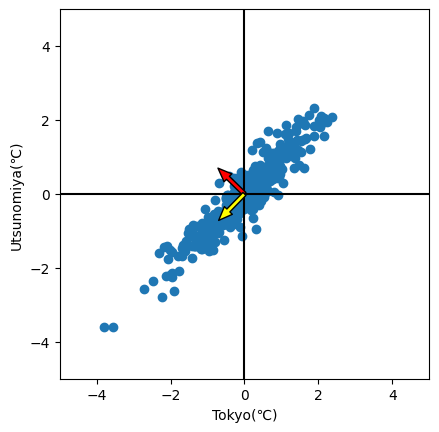

In [12]:
draw_scatter(tokyoa, utsua, 'Tokyo(℃)', 'Utsunomiya(℃)')
draw_arrow(e1, 'red')
draw_arrow(e2, 'yellow')